In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset_path = 'data/drug200.csv'
dataset = pd.read_csv(dataset_path)
df = dataset.copy()
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Check unique values in 'Drug' column

In [38]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Use Integer encoding for columns with categorical variables

In [39]:
df.Sex = df.Sex.replace(['F', 'M'], [0, 1])
df.BP = df.BP.replace(['LOW', 'NORMAL', 'HIGH'], [0, 1, 2])
df.Cholesterol = df.Cholesterol.replace(['NORMAL', 'HIGH'], [1, 2])
df.Drug = df.Drug.replace(['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'],
                          [0, 1, 2, 3, 4])
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,2
196,16,1,0,2,12.006,2
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


Training the decision tree model with all features of dataset

In [40]:
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

Evaluating the decision tree classification accuracy

In [43]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9666666666666667
R2: 0.9780179520058618
MSE: 0.03333333333333333


In [44]:
df.Drug = df.Drug.replace([0, 1, 2, 3, 4],
                          ['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'])

Visualizing the decision tree

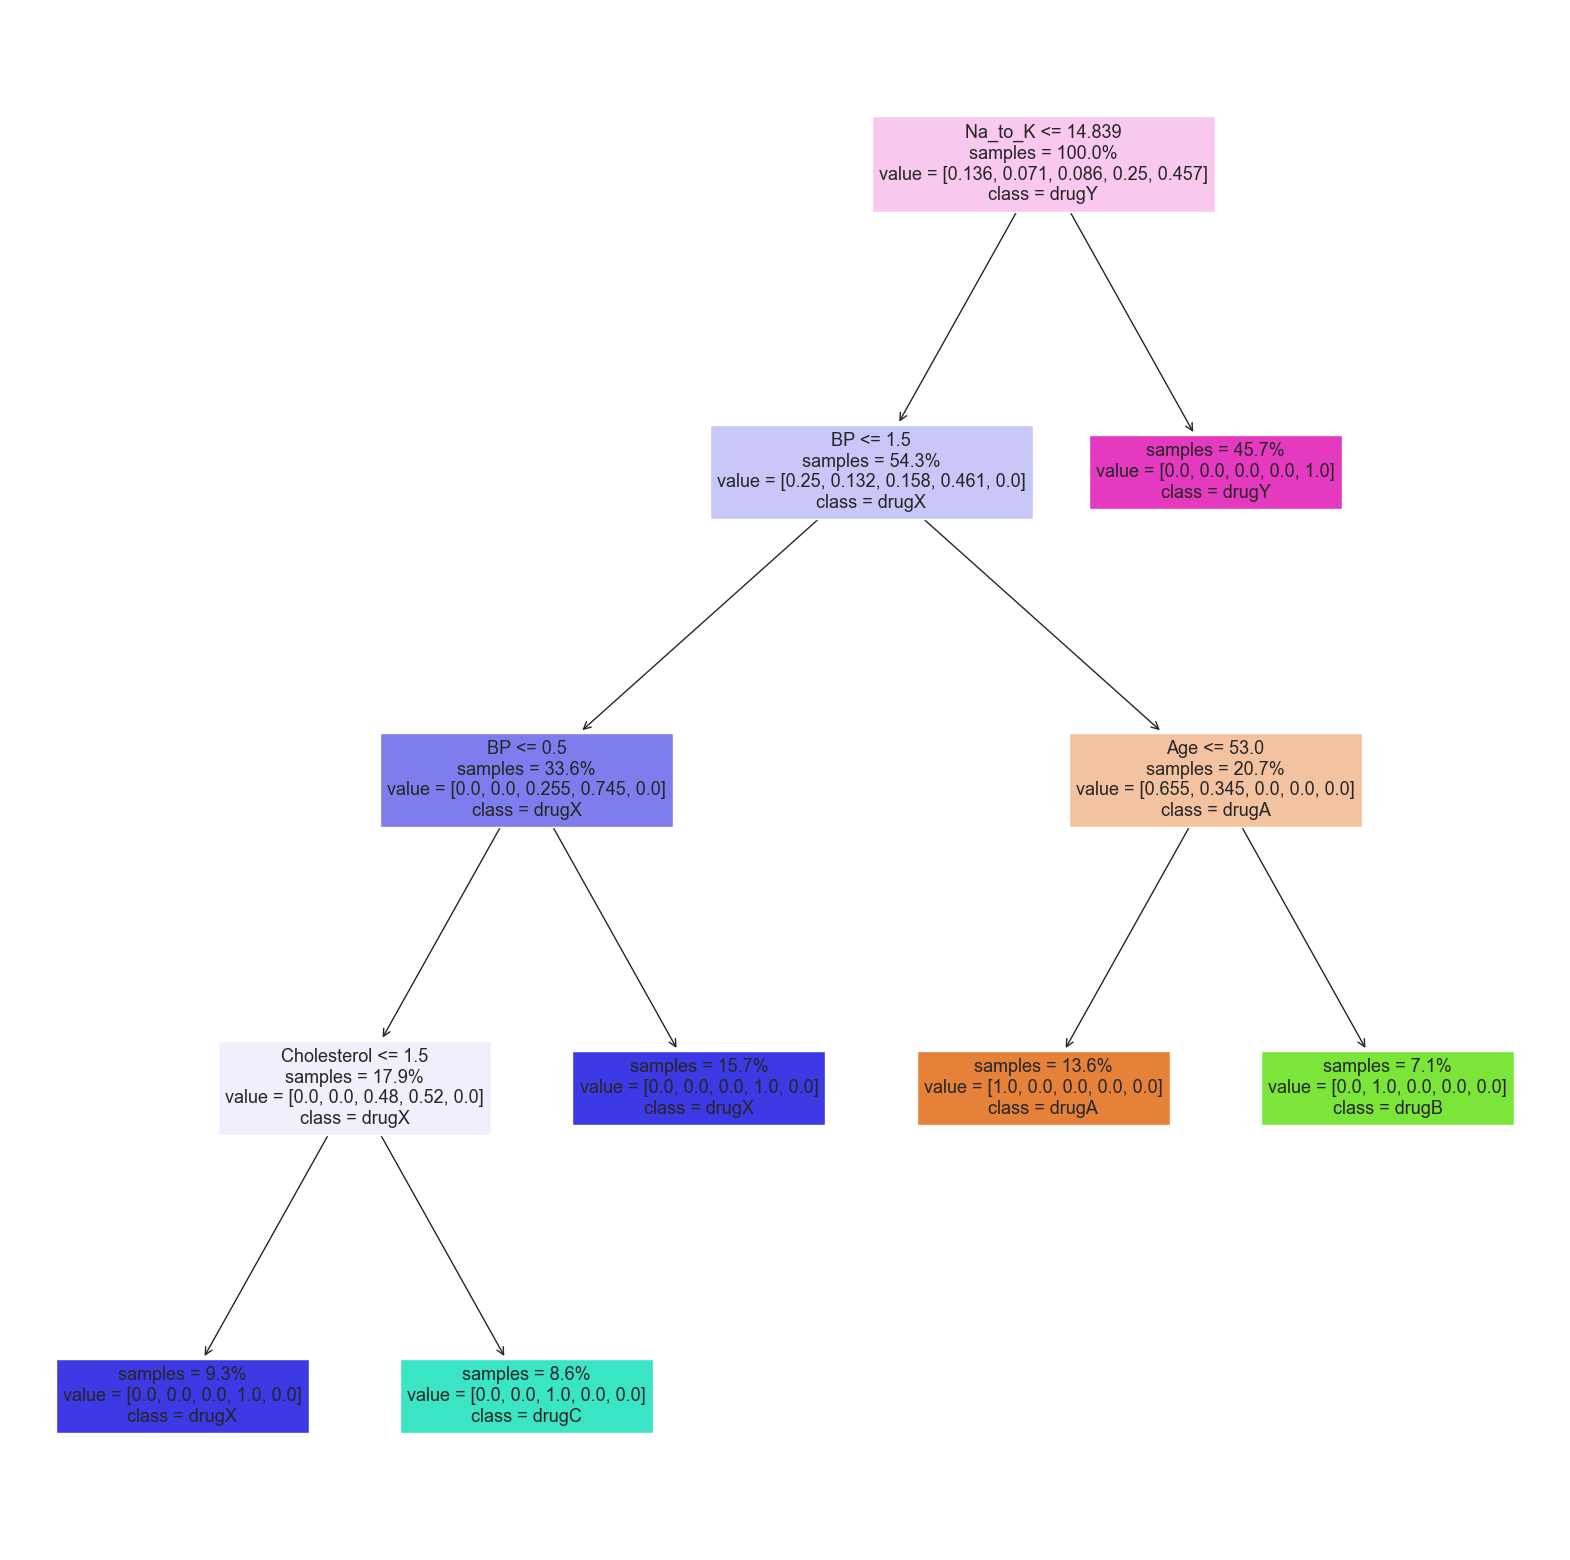

In [45]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtree, feature_names=df.columns, 
          class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
          impurity=False, proportion=True, filled=True)
fig.savefig('src/dtree.png')

Replace string values in 'Drug' column to integers for making heatmap

In [46]:
df.Drug = df.Drug.replace(['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'],
                          [0, 1, 2, 3, 4])
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,2
196,16,1,0,2,12.006,2
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


Let's analyze the correlation of features

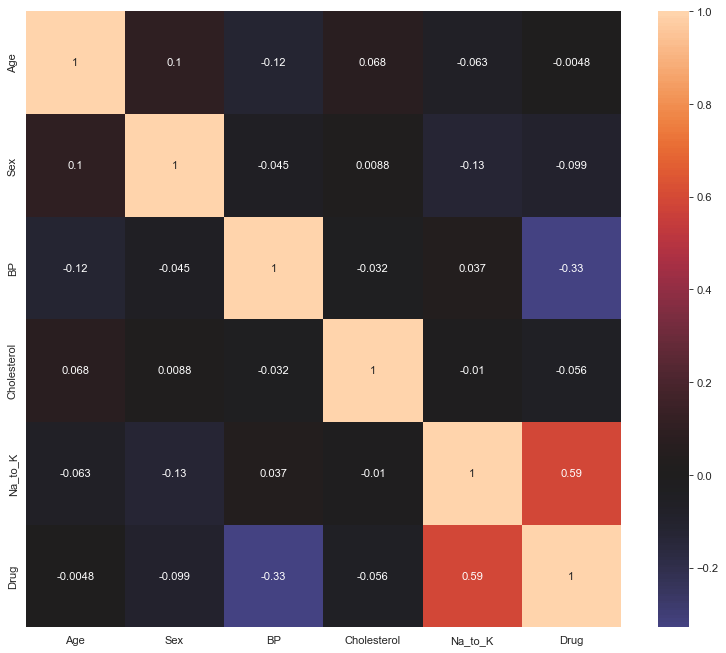

In [47]:
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df.loc[:, 'Age':'Drug'].corr(), xticklabels=df.loc[:, 'Age':'Drug'].corr().columns, center=0, annot=True)
plt.show()

Let's try to build a model without 'Age' parameter

In [48]:
feature_cols = ['Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9
R2: 0.9340538560175856
MSE: 0.1


Model accuracy without 'Age' parameter remained good

Let's try to build model without 'Cholesterol' parameter

In [49]:
feature_cols = ['Age', 'Sex', 'BP', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9333333333333333
R2: 0.9560359040117238
MSE: 0.06666666666666667


Model accuracy without the 'Cholesterol' parameter is higher than without the 'Age' parameter

Now, try to build model without 'Sex' parameter, which correlates with the target more strongly than the previous ones

In [50]:
feature_cols = ['Age', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9666666666666667
R2: 0.9780179520058618
MSE: 0.03333333333333333


Surprisingly, ignoring the more correlated parameter resulted in higher model accuracy than in past experiments.
The results of this model completely match with the first model

So, try to build model without ‘BP’ parameter

In [51]:
feature_cols = ['Age', 'Sex', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.6
R2: -0.31892287964828725
MSE: 2.0


Model accuracy and error are terrible, 'BP' is a required parameter

For final, try to build model without 'Na_to_K' parameter

In [52]:
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.43333333333333335
R2: -1.1762227514196737
MSE: 3.3


The results are similar to the previous experiment

Significance of parameters: 'Na_to_K' > 'BP' > 'Cholesterol' > 'Age' > 'Sex'